In [1]:
from sklearn.feature_extraction.text import CountVectorizer
from pyvi import ViTokenizer
import pandas as pd
import re

In [2]:
df = pd.read_csv('data_after_remove.csv', index_col=0)
df.head(5)

,Description,Gerne,Label
0,Ngày Xưa Có Một Chuyện Tình\nNGÀY XƯA CÓ MỘT C...,Tiểu Thuyết,1
1,Đi Qua Hoa Cúc\nCuốn Đi Qua Hoa Cúc là tập tru...,Tiểu Thuyết,1
2,"Cô Gái Đến Từ Hôm Qua\nNếu ngày xưa còn bé, Th...",Tiểu Thuyết,1
3,Những ngày thơ ấu có thể coi là một tác phẩm x...,Tiểu Thuyết,1
4,"Đến tuổi cập kê, Tristran Thorn đem lòng si mê...",Tiểu Thuyết,1


In [3]:
for index, row in df.iterrows():
    row['Description'] = ViTokenizer.tokenize(row['Description'])

In [4]:
df['Description'] = df['Description'].apply(str.lower)
df

,Description,Gerne,Label
0,ngày xưa có một chuyện tình\nngày xưa có một c...,Tiểu Thuyết,1
1,đi qua hoa cúc\ncuốn đi qua hoa cúc là tập tru...,Tiểu Thuyết,1
2,"cô gái đến từ hôm qua\nnếu ngày xưa còn bé, th...",Tiểu Thuyết,1
3,những ngày thơ ấu có thể coi là một tác phẩm x...,Tiểu Thuyết,1
4,"đến tuổi cập kê, tristran thorn đem lòng si mê...",Tiểu Thuyết,1
...,...,...,...
723,bài thi ic3 (internet and computing core certi...,Khác,3
724,giảng đường trò chuyện\ngiảng đường trò chuyện...,Khác,3
725,ai làm đau tiếng việt?\nchúng tôi không trình ...,Khác,3
726,nghiên cứu và ứng dụng lâm sàng những bài thuố...,Khác,3


In [5]:
with open('vietnamese-stopwords-dash.txt','r', encoding='utf-8') as f:
    sw = f.readlines()
sw = [i[:-1] for i in sw]

In [6]:
def stopwords(text):
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    return " ".join(text).strip()

In [8]:
df['Description'] = df['Description'].apply(stopwords)
df

,Description,Gerne,Label
0,xưa tình xưa tình tác phẩm tinh 2 2016 văn ngu...,Tiểu Thuyết,1
1,đi hoa cúc đi hoa cúc tập truyện nguyễn nhật á...,Tiểu Thuyết,1
2,"gái hôm xưa bé, thư hào trai thông minh quyền ...",Tiểu Thuyết,1
3,thơ ấu thể coi tác phẩm xuất sắc. tập hồi ký t...,Tiểu Thuyết,1
4,"cập kê, tristran thorn đem si mê nữ xinh đẹp l...",Tiểu Thuyết,1
...,...,...,...
723,thi ic3 (internet and computing core certifica...,Khác,3
724,giảng đường trò giảng đường trò quyển sách vấn...,Khác,3
725,đau tiếng việt? trình bày chuyên mục hàn lâm q...,Khác,3
726,nghiên cứu ứng dụng lâm sàng thuốc bổ đông y l...,Khác,3


In [9]:
def remove_punctuation(text):
    vietnamese_text = re.sub(r'[^a-zA-Z0123456789àáạảãâầấậẩẫăằắặẳẵèéẹẻẽêềếệểễìíịỉĩòóọỏõôồốộổỗơờớợởỡùúụủũưừứựửữỳýỵỷỹđÀÁẠẢÃÂẦẤẬẨẪĂẰẮẶẲẴÈÉẸẺẼÊỀẾỆỂỄÌÍỊỈĨÒÓỌỎÕÔỒỐỘỔỖƠỜỚỢỞỠÙÚỤỦŨƯỪỨỰỬỮỲÝỴỶỸĐ\s]', '', text.lower())
    return vietnamese_text.lower()

In [11]:
df['Description'] = df['Description'].apply(remove_punctuation)
df

,Description,Gerne,Label
0,xưa tình xưa tình tác phẩm tinh 2 2016 văn ngu...,Tiểu Thuyết,1
1,đi hoa cúc đi hoa cúc tập truyện nguyễn nhật á...,Tiểu Thuyết,1
2,gái hôm xưa bé thư hào trai thông minh quyền b...,Tiểu Thuyết,1
3,thơ ấu thể coi tác phẩm xuất sắc tập hồi ký th...,Tiểu Thuyết,1
4,cập kê tristran thorn đem si mê nữ xinh đẹp là...,Tiểu Thuyết,1
...,...,...,...
723,thi ic3 internet and computing core certificat...,Khác,3
724,giảng đường trò giảng đường trò quyển sách vấn...,Khác,3
725,đau tiếng việt trình bày chuyên mục hàn lâm qu...,Khác,3
726,nghiên cứu ứng dụng lâm sàng thuốc bổ đông y l...,Khác,3


In [12]:
from nltk import ngrams

In [13]:
def split_description_with_ngrams(df, n):
    # Create a new column to store the n-gram split data
    df['Description_Ngrams'] = df['Description'].apply(lambda x: split_data_with_ngrams(x, n))
    return df

def split_data_with_ngrams(data, n):
    # Tokenize the data into words or characters, depending on your requirements
    tokens = data.split()  # Change this to split by characters if needed

    # Generate n-grams
    ngram_list = list(ngrams(tokens, n))

    return ngram_list

In [14]:
ngram_size = 20
df = split_description_with_ngrams(df, ngram_size)
df.shape

(728, 4)

In [15]:
df=df.explode('Description_Ngrams')
df = df.reset_index(drop=True)
df.head()

,Description,Gerne,Label,Description_Ngrams
0,xưa tình xưa tình tác phẩm tinh 2 2016 văn ngu...,Tiểu Thuyết,1,"(xưa, tình, xưa, tình, tác, phẩm, tinh, 2, 201..."
1,xưa tình xưa tình tác phẩm tinh 2 2016 văn ngu...,Tiểu Thuyết,1,"(tình, xưa, tình, tác, phẩm, tinh, 2, 2016, vă..."
2,xưa tình xưa tình tác phẩm tinh 2 2016 văn ngu...,Tiểu Thuyết,1,"(xưa, tình, tác, phẩm, tinh, 2, 2016, văn, ngu..."
3,xưa tình xưa tình tác phẩm tinh 2 2016 văn ngu...,Tiểu Thuyết,1,"(tình, tác, phẩm, tinh, 2, 2016, văn, nguyễn, ..."
4,xưa tình xưa tình tác phẩm tinh 2 2016 văn ngu...,Tiểu Thuyết,1,"(tác, phẩm, tinh, 2, 2016, văn, nguyễn, nhật, ..."


In [16]:
df['Description'] = df.apply(lambda x: ' '.join(x['Description_Ngrams']) if isinstance(x['Description_Ngrams'], tuple) else x['Description'], axis=1)
df

,Description,Gerne,Label,Description_Ngrams
0,xưa tình xưa tình tác phẩm tinh 2 2016 văn ngu...,Tiểu Thuyết,1,"(xưa, tình, xưa, tình, tác, phẩm, tinh, 2, 201..."
1,tình xưa tình tác phẩm tinh 2 2016 văn nguyễn ...,Tiểu Thuyết,1,"(tình, xưa, tình, tác, phẩm, tinh, 2, 2016, vă..."
2,xưa tình tác phẩm tinh 2 2016 văn nguyễn nhật ...,Tiểu Thuyết,1,"(xưa, tình, tác, phẩm, tinh, 2, 2016, văn, ngu..."
3,tình tác phẩm tinh 2 2016 văn nguyễn nhật ánh ...,Tiểu Thuyết,1,"(tình, tác, phẩm, tinh, 2, 2016, văn, nguyễn, ..."
4,tác phẩm tinh 2 2016 văn nguyễn nhật ánh 300 t...,Tiểu Thuyết,1,"(tác, phẩm, tinh, 2, 2016, văn, nguyễn, nhật, ..."
...,...,...,...,...
36551,đức phật vị thiền sư nổi tiếng kinh nghiệm sốn...,Khác,3,"(đức, phật, vị, thiền, sư, nổi, tiếng, kinh, n..."
36552,phật vị thiền sư nổi tiếng kinh nghiệm sống cô...,Khác,3,"(phật, vị, thiền, sư, nổi, tiếng, kinh, nghiệm..."
36553,vị thiền sư nổi tiếng kinh nghiệm sống cô quyể...,Khác,3,"(vị, thiền, sư, nổi, tiếng, kinh, nghiệm, sống..."
36554,thiền sư nổi tiếng kinh nghiệm sống cô quyển c...,Khác,3,"(thiền, sư, nổi, tiếng, kinh, nghiệm, sống, cô..."


In [17]:
df.drop(columns='Description_Ngrams', inplace=True)
df.head()

,Description,Gerne,Label
0,xưa tình xưa tình tác phẩm tinh 2 2016 văn ngu...,Tiểu Thuyết,1
1,tình xưa tình tác phẩm tinh 2 2016 văn nguyễn ...,Tiểu Thuyết,1
2,xưa tình tác phẩm tinh 2 2016 văn nguyễn nhật ...,Tiểu Thuyết,1
3,tình tác phẩm tinh 2 2016 văn nguyễn nhật ánh ...,Tiểu Thuyết,1
4,tác phẩm tinh 2 2016 văn nguyễn nhật ánh 300 t...,Tiểu Thuyết,1


In [18]:
df['Gerne'].value_counts()

Gerne
Tiểu Thuyết     15243
Khác            13909
Kỹ Năng Sống     7404
Name: count, dtype: int64

In [19]:

# Tạo count_vectorize
count_vectorizer = CountVectorizer()
count_vectorizer.fit(df['Description'])
# vectorized_data = count_vectorizer.transform(preprocessed_dataset)


CountVectorizer()

In [20]:
dictionary = count_vectorizer.vocabulary_

In [21]:
x = dictionary.keys()
new = {i: 0 for i in x}

In [22]:
def count_word(text, word):
    return text.count(' '+word+' ')

In [23]:
for _, row in df.iterrows():
    for word in new.keys():
        new[word] += count_word(row['Description'], word)

In [24]:
#Thống kê top 10 tần số sử dụng các từ vựng trong tập dữ liệu
dictionary = new
dictionary = dict(sorted(dictionary.items(), key = lambda item: item[1],reverse=True))
list(dictionary.items())
# dictionary

[('học', 7000),
 ('sách', 6103),
 ('thể', 5600),
 ('sống', 5150),
 ('bệnh', 4207),
 ('tác', 4124),
 ('ta', 4027),
 ('thành', 3488),
 ('tình', 3481),
 ('quan', 3361),
 ('công', 3239),
 ('lý', 3152),
 ('giúp', 3079),
 ('đời', 3021),
 ('thời', 2955),
 ('câu', 2942),
 ('thực', 2891),
 ('yêu', 2855),
 ('giới', 2855),
 ('tâm', 2854),
 ('khoa', 2812),
 ('văn', 2809),
 ('giả', 2793),
 ('sinh', 2765),
 ('nhân', 2742),
 ('hiện', 2717),
 ('bí', 2644),
 ('dụng', 2509),
 ('đầu', 2470),
 ('cảm', 2410),
 ('đọc', 2358),
 ('hành', 2333),
 ('năng', 2197),
 ('trình', 2195),
 ('tập', 2190),
 ('kinh', 2183),
 ('thức', 2162),
 ('vật', 2135),
 ('động', 2134),
 ('đi', 2124),
 ('ẩn', 2100),
 ('phẩm', 1983),
 ('sức', 1950),
 ('phương', 1948),
 ('kỳ', 1927),
 ('gia', 1909),
 ('thông', 1897),
 ('thân', 1854),
 ('trị', 1829),
 ('tế', 1810),
 ('hai', 1801),
 ('liệu', 1790),
 ('pháp', 1782),
 ('giải', 1742),
 ('thuật', 1687),
 ('hợp', 1649),
 ('mình', 1619),
 ('hệ', 1615),
 ('kết', 1592),
 ('trường', 1581),
 ('bao',

In [25]:
#Thống kê độ dài trung bình của các dòng chữ liệu
ans = 0
for index, row in df.iterrows():
    ans += len(row['Description'])
ans /= df.shape[0]
ans

90.31890797680272

In [26]:
#Create new column for Countvectorize
description_vector = count_vectorizer.fit_transform(df['Description'])
df['Description_vector'] = description_vector.toarray().tolist()
df.head()

,Description,Gerne,Label,Description_vector
0,xưa tình xưa tình tác phẩm tinh 2 2016 văn ngu...,Tiểu Thuyết,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,tình xưa tình tác phẩm tinh 2 2016 văn nguyễn ...,Tiểu Thuyết,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,xưa tình tác phẩm tinh 2 2016 văn nguyễn nhật ...,Tiểu Thuyết,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,tình tác phẩm tinh 2 2016 văn nguyễn nhật ánh ...,Tiểu Thuyết,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,tác phẩm tinh 2 2016 văn nguyễn nhật ánh 300 t...,Tiểu Thuyết,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [27]:
df['Length'] = df['Description'].apply(len)
df.head()

,Description,Gerne,Label,Description_vector,Length
0,xưa tình xưa tình tác phẩm tinh 2 2016 văn ngu...,Tiểu Thuyết,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",92
1,tình xưa tình tác phẩm tinh 2 2016 văn nguyễn ...,Tiểu Thuyết,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",92
2,xưa tình tác phẩm tinh 2 2016 văn nguyễn nhật ...,Tiểu Thuyết,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",92
3,tình tác phẩm tinh 2 2016 văn nguyễn nhật ánh ...,Tiểu Thuyết,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",93
4,tác phẩm tinh 2 2016 văn nguyễn nhật ánh 300 t...,Tiểu Thuyết,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",92


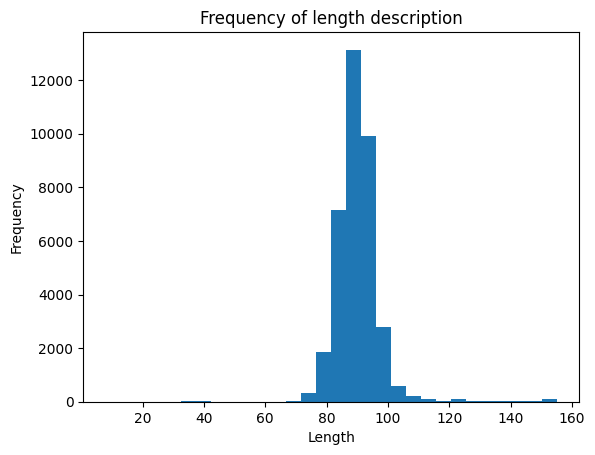

In [28]:
import matplotlib.pyplot as plt

# Vẽ biểu đồ histogram
plt.hist(df['Length'], bins=30)

# Đặt tiêu đề và các nhãn trục
plt.title('Frequency of length description')
plt.xlabel('Length')
plt.ylabel('Frequency')

# Hiển thị biểu đồ
plt.show()

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Tạo một instance của TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit và chuyển đổi dữ liệu văn bản thành ma trận TF-IDF
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Description'])

# Cho vao cot moi

df['TFIDF'] = tfidf_matrix.toarray().tolist()
df.head()

,Description,Gerne,Label,Description_vector,Length,TFIDF
0,xưa tình xưa tình tác phẩm tinh 2 2016 văn ngu...,Tiểu Thuyết,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",92,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,tình xưa tình tác phẩm tinh 2 2016 văn nguyễn ...,Tiểu Thuyết,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",92,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,xưa tình tác phẩm tinh 2 2016 văn nguyễn nhật ...,Tiểu Thuyết,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",92,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,tình tác phẩm tinh 2 2016 văn nguyễn nhật ánh ...,Tiểu Thuyết,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",93,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,tác phẩm tinh 2 2016 văn nguyễn nhật ánh 300 t...,Tiểu Thuyết,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",92,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [30]:
df.to_csv('data_remove_fixed.csv')